**<h2> DATA MANIPULATION & NAIVE BAYES CLASSIFIER WITH FLIGHTS DATESET <h2>**

<h3>

By [*Chris Le*](https://www.linkedin.com/in/hdang-le3107/)

<h3>

The aviation industry is dynamic with various variables impacting flight operations. A prominent airline company in the Pacific Northwest has accumulated extensive data related to flights and weather patterns and needs to understand the factors influencing the departure delays and cancellations to benefit both airlines and passengers. These datasets provide comprehensive information on flights departing in the first half of 2022 from both of the two major airports in this region: SEA (Seattle-Tacoma International Airport) and PDX (Portland International Airport):

This project seeks to analyze the `flights2022.csv` dataset containing *111,006* flight records and *29* fields.

The project consists of two parts:


<h3>
I. Data Manipulation, EDA and Visualizations <br>

II. Naive Bayes Classifier to Predict Flight Cancellations
<h3>

##### `flights2022.csv`

Contains information about each flight, including:

| Variable   | Description                                                   |
|------------|---------------------------------------------------------------|
| dep_time   | Departure time (in the format hhmm) where NA corresponds to a cancelled flight |
| dep_delay  | Departure delay, in minutes (negative for early)              |
| origin     | Origin airport where flight starts (IATA code)                |
| airline    | Carrier/airline name                                          |
| dest       | Destination airport where flight lands (IATA code)            |
| visib      | Visibility (in miles)                                         |
| wind_gust  | Wind gust speed (in mph)                                      |
| wind_speed | Wind speed (in mph)                                           |
| temp       | Temperature (in degrees Fahrenheit)                           |
| dewp       | Dew Point Temperature (in degrees Fahrenheit)                 |
| humid      | Humidity Percentage                                           |
| pressure   | Atmospheric Pressure (in hPa)                                 |
| precip     | Precipitation (in Inches)                                     |







**<h3> `I. Data Manipulation, EDA and Visualizations` <h3>**

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [48]:
df = pd.read_csv(r"C:\Users\Dang3\Downloads\flights2022.csv")
df.head(10)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,airline,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,...,United Air Lines Inc.,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,...,Alaska Airlines Inc.,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,...,Alaska Airlines Inc.,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,...,Alaska Airlines Inc.,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,...,United Air Lines Inc.,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0
5,2022,1,1,51.0,2352,59.0,840.0,758,42.0,B6,...,JetBlue Airways,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0
6,2022,1,1,104.0,43,21.0,936.0,930,6.0,AA,...,American Airlines Inc.,25.0,14.0,62.50,350.0,8.05546,9.270062,0.0,1020.7,10.0
7,2022,1,1,131.0,2251,160.0,216.0,2347,149.0,QX,...,Horizon Air,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
8,2022,1,1,142.0,2305,157.0,900.0,657,123.0,UA,...,United Air Lines Inc.,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
9,2022,1,1,255.0,2355,180.0,831.0,549,162.0,UA,...,United Air Lines Inc.,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0


In [49]:
df.isna().sum()

year                 0
month                0
day                  0
dep_time          2440
sched_dep_time       0
dep_delay         2440
arr_time          2537
sched_arr_time       0
arr_delay         2674
carrier              0
flight               0
tailnum            128
origin               0
dest                 0
air_time          2674
distance             0
hour                 0
minute               0
time_hour            0
airline              0
temp                 0
dewp                 0
humid                0
wind_dir          3163
wind_speed         279
wind_gust          279
precip               0
pressure             0
visib                0
dtype: int64

In [50]:
# Remove records with blank (NA) in 'tailnum'
df = df[df['tailnum'].notna()]
df.head(10)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,airline,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,...,United Air Lines Inc.,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,...,Alaska Airlines Inc.,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,...,Alaska Airlines Inc.,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,...,Alaska Airlines Inc.,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,...,United Air Lines Inc.,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0
5,2022,1,1,51.0,2352,59.0,840.0,758,42.0,B6,...,JetBlue Airways,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0
6,2022,1,1,104.0,43,21.0,936.0,930,6.0,AA,...,American Airlines Inc.,25.0,14.0,62.50,350.0,8.05546,9.270062,0.0,1020.7,10.0
7,2022,1,1,131.0,2251,160.0,216.0,2347,149.0,QX,...,Horizon Air,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
8,2022,1,1,142.0,2305,157.0,900.0,657,123.0,UA,...,United Air Lines Inc.,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
9,2022,1,1,255.0,2355,180.0,831.0,549,162.0,UA,...,United Air Lines Inc.,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0


In [51]:
# Create new column route that combines origin and dest
df["route"] = df["origin"] + " - " + df["dest"]
df

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,route
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,...,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,SEA - IAH
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,...,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0,SEA - FAI
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,...,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,SEA - ATL
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,...,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,SEA - ORD
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,...,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0,PDX - ORD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111001,2022,6,30,1244.0,1250,-6.0,1835.0,1840,-5.0,AS,...,56.0,51.0,83.88,30.0,9.20624,10.594357,0.0,1021.5,10.0,SEA - DFW
111002,2022,6,30,1245.0,1240,5.0,1446.0,1450,-4.0,AS,...,60.0,53.0,77.65,20.0,6.90468,7.945768,0.0,1021.9,10.0,SEA - FAT
111003,2022,6,30,1246.0,1235,11.0,1645.0,1615,30.0,AS,...,65.0,53.0,65.56,280.0,6.90468,7.945768,0.0,1021.3,10.0,SEA - DEN
111004,2022,6,30,1250.0,1239,11.0,1636.0,1626,10.0,UA,...,56.0,51.0,83.88,30.0,9.20624,10.594357,0.0,1021.5,10.0,SEA - DEN


In [46]:
# def detect_outliers_iqr(data):
#     Q1 = data.quantile(0.25)
#     Q3 = data.quantile(0.75)
#     IQR = Q3 - Q1
#     outliers = data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]
#     return outliers
# len(detect_outliers_iqr(df['precip']))

26282

In [52]:
# Create new column cancel based on NA value in dep_time
df["cancel"] = df["dep_time"].isna().astype(int)

# By default NA values are excluded from group keys during the Pandas groupby operation
#Counting number of cancelled flights and mean departure delay time by routes
routes_delays_cancels = df.groupby("route").agg(avg_delay = ("dep_delay", "mean"), no_cancelled = ("cancel", "sum"))

# Counting number of cancelled flights and mean delay time by airlines
airlines_delays_cancels = df.groupby("airline").agg(avg_delay = ("dep_delay", "mean"), no_cancelled = ("cancel", "sum"))

print(routes_delays_cancels, airlines_delays_cancels)

           avg_delay  no_cancelled
route                             
PDX - ABQ   0.611842             2
PDX - ANC   4.748936             4
PDX - ATL   7.050967            13
PDX - AUS   5.435374             5
PDX - BOI   5.165939             7
...              ...           ...
SEA - STS   6.397333             5
SEA - SUN   5.735537             5
SEA - TPA   6.553015            20
SEA - TUS   6.180608            13
SEA - YKM   5.460000            11

[149 rows x 2 columns]                         avg_delay  no_cancelled
airline                                        
Alaska Airlines Inc.     6.751572          1300
Allegiant Air           26.255556             2
American Airlines Inc.  19.913783            85
Delta Air Lines Inc.    10.626629           379
Frontier Airlines Inc.  14.427602             0
Hawaiian Airlines Inc.   8.186207             0
Horizon Air              6.253491           238
JetBlue Airways         42.203762            33
SkyWest Airlines Inc.    4.612112        

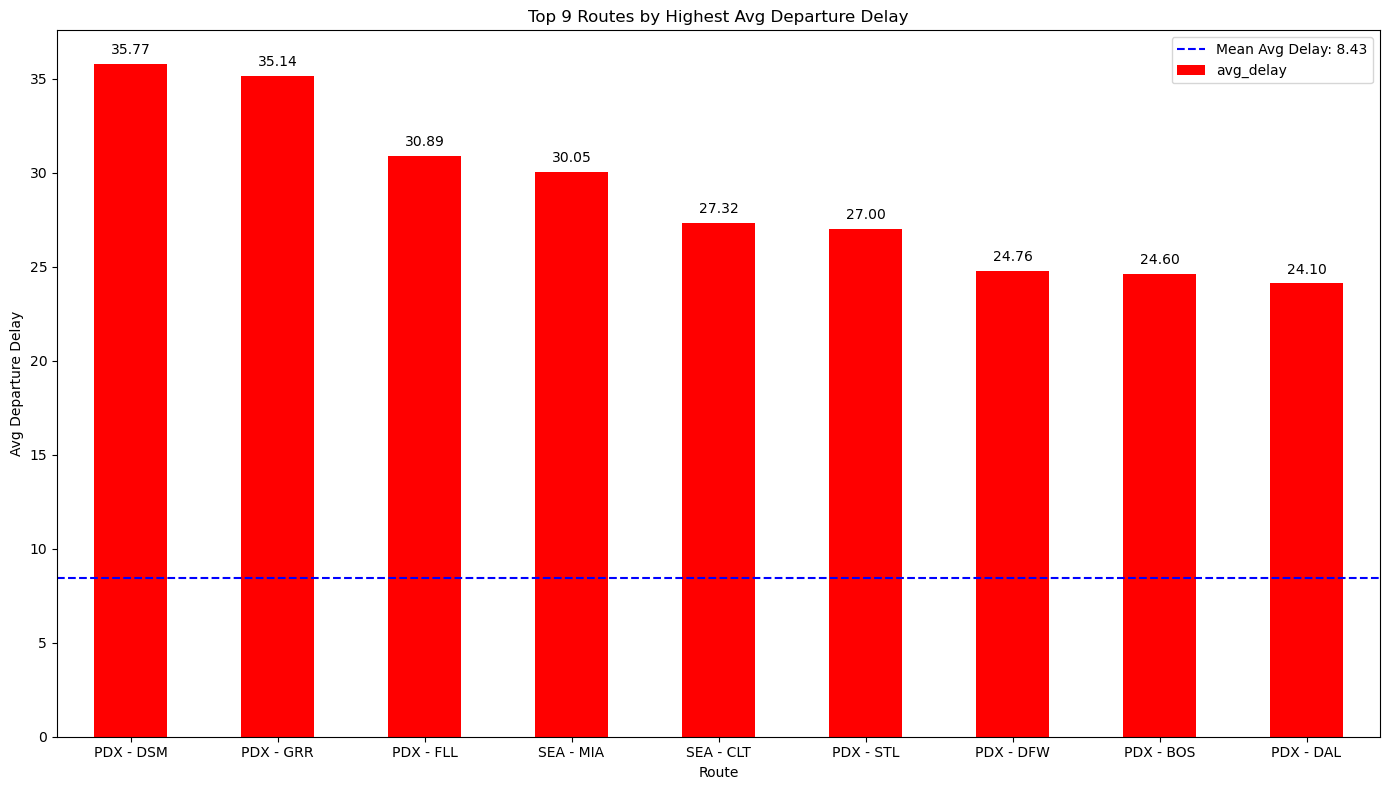

In [53]:
top9_routes_delays = routes_delays_cancels.nlargest(n = 9, columns = "avg_delay").iloc[:,0]     # Sort Top 9 by Avg Delay column, slicing df

mean_delay = routes_delays_cancels['avg_delay'].mean()

plt.figure(figsize= (14, 8))
bar1 = top9_routes_delays.plot(kind="bar", color="red")
plt.title("Top 9 Routes by Highest Avg Departure Delay")
plt.xlabel("Route")
plt.ylabel("Avg Departure Delay")
plt.xticks(rotation=0)

plt.axhline(y=mean_delay, color='blue', linestyle='--', label=f'Mean Avg Delay: {mean_delay:.2f}')


for i in bar1.patches:
    bar1.annotate(f'{i.get_height():.2f}',                                                      # Get data label, specify 2 decimals
                (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.legend()
plt.tight_layout()
plt.show()

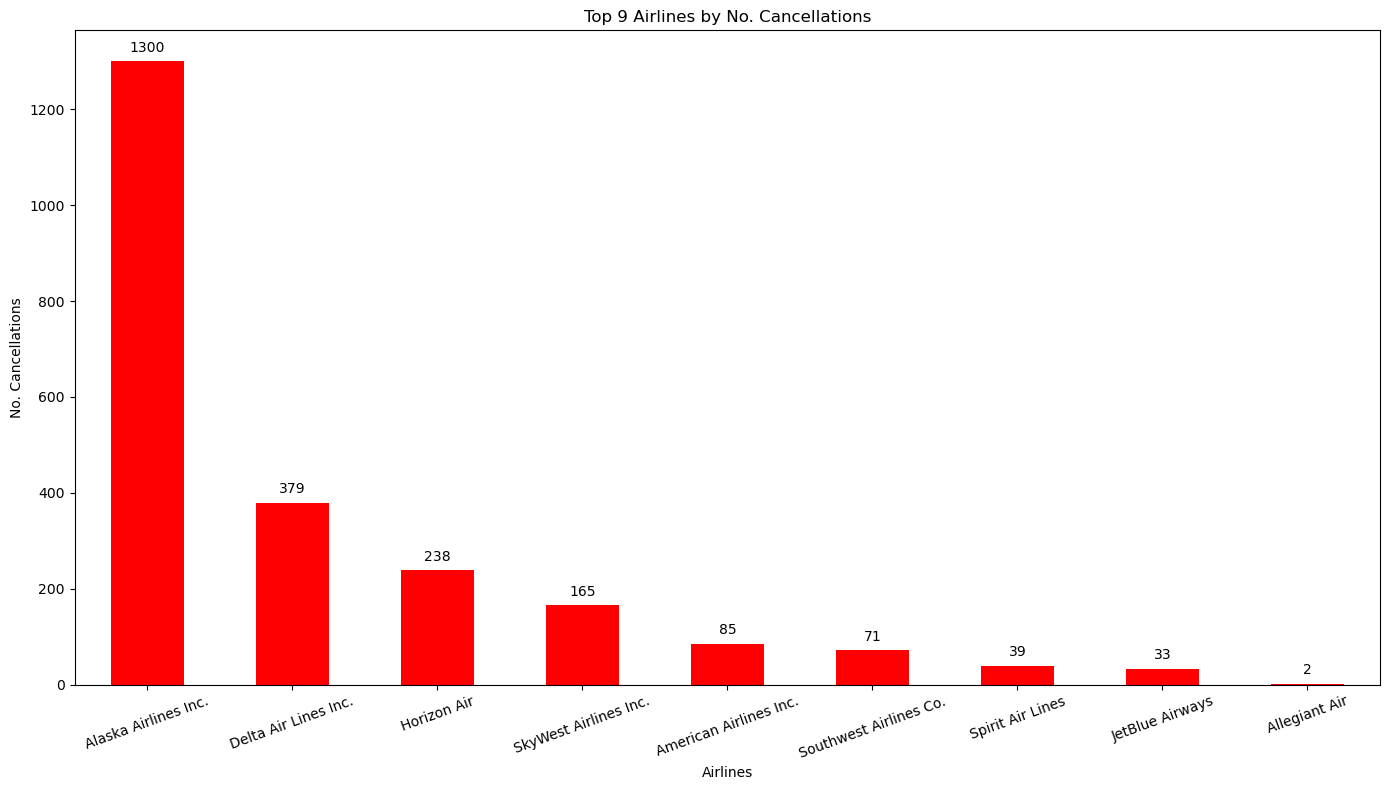

In [54]:
top9_airlines_cancel = airlines_delays_cancels.nlargest(n = 9, columns = "no_cancelled").iloc[:,1]
plt.figure(figsize=(14, 8))
bar2 = top9_airlines_cancel.plot(kind="bar", color="red")
plt.title("Top 9 Airlines by No. Cancellations")
plt.xlabel("Airlines")
plt.ylabel("No. Cancellations")
plt.xticks(rotation = 20)
for i in bar2.patches:
    bar2.annotate(i.get_height(),                                                      # Get data label
                (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.tight_layout()
plt.show()

In [55]:
# Selecting features and target variable
X = df[["distance", "temp", "dewp", "humid", "pressure","precip", "visib"]]
Y = df["cancel"]

#"month", "day", "sched_dep_time"

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train_scaled, y_train)

# Predicting the Test set results
y_pred = gnb.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generating the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")
print(X)


Accuracy: 0.9596861471861472
Confusion Matrix:
[[21256   454]
 [  440    26]]
        distance  temp  dewp  humid  pressure  precip  visib
0           1874  33.0  23.0  66.06    1022.9     0.0   10.0
1           1533  32.0  23.0  69.04    1023.4     0.0   10.0
2           2182  33.0  23.0  66.06    1022.9     0.0   10.0
3           1721  33.0  23.0  66.06    1022.9     0.0   10.0
4           1739  33.0  19.0  55.75    1025.1     0.0   10.0
...          ...   ...   ...    ...       ...     ...    ...
111001      1660  56.0  51.0  83.88    1021.5     0.0   10.0
111002       748  60.0  53.0  77.65    1021.9     0.0   10.0
111003      1024  65.0  53.0  65.56    1021.3     0.0   10.0
111004      1024  56.0  51.0  83.88    1021.5     0.0   10.0
111005       512  56.0  50.0  80.52    1021.8     0.0   10.0

[110878 rows x 7 columns]


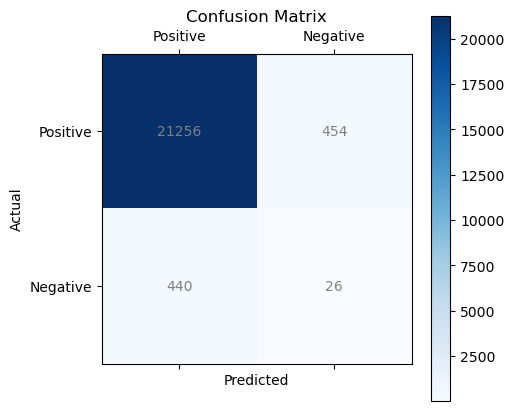

In [56]:
fig, ax = plt.subplots(figsize=(5, 5))
cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Explicitly set the tick positions
ax.set_xticks(np.arange(conf_matrix.shape[1]))
ax.set_yticks(np.arange(conf_matrix.shape[0]))

# Then, set the tick labels
ax.set_xticklabels(["Positive", "Negative"])
ax.set_yticklabels(["Positive", "Negative"])

# Display the numbers on the colors
for (i, j), val in np.ndenumerate(conf_matrix):
    ax.text(j, i, f"{val}", ha="center", va="center", color="Grey")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()